# KMeans from Scratch

Machine Learning Class at ITESO - 2023

In [169]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [170]:
# create fake data
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)

In [171]:
set(y)

{0, 1, 2}

In [172]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df

,class,x1,x2
0,2,-8.573215,-9.909804
1,1,6.266913,-0.488559
2,0,-3.448146,10.099406
3,1,7.445467,-0.830532
4,2,-6.164052,-5.758541
...,...,...,...
95,0,-3.863042,10.237639
96,0,-0.447199,10.876846
97,1,4.317307,2.781271
98,2,-4.713525,-4.772505


<Axes: xlabel='x1', ylabel='x2'>

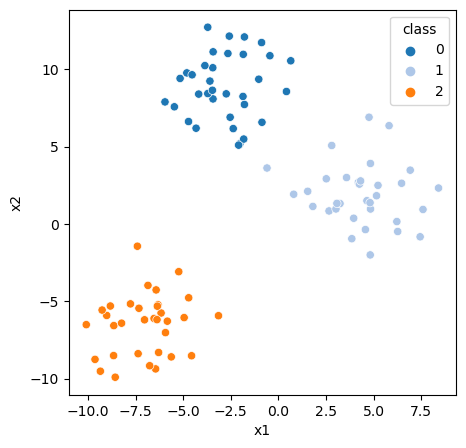

In [173]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

# Algorithm


## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [174]:
k = 3

# Step 1

idx = np.random.choice(len(X), k)
centroids = X[idx, :]
idx

array([85, 90, 60])

In [175]:
centroids

array([[-2.09147043,  5.09494588],
       [ 4.81397297,  1.37515498],
       [-6.29348224, -8.30881243]])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.


In [176]:
from scipy.spatial.distance import cdist

# Step 2
distances = cdist(XA = X, XB= centroids, metric='euclidean') 
distances[0:5]

array([[16.34489303, 17.50905743,  2.78574117],
       [10.0517712 ,  2.36314729, 14.79594201],
       [ 5.18509334, 12.01562216, 18.62682071],
       [11.22784386,  3.43363077, 15.64235949],
       [11.59241528, 13.09223642,  2.55355415]])

## Step 3
Now assign each data point to the closest centroid

In [177]:
# Step 3
points = np.argmin(distances, axis=1)
points

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [178]:
# Step 4
temp_centroids = []

for cluster in range(k):
    # Update
    temp_cluster_centroid = np.mean(X[points==cluster], axis =0)
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)
temp_centroids

array([[-2.76278739,  8.70751352],
       [ 4.51410219,  1.85116106],
       [-7.02379204, -6.47232379]])

# Step 5
Centroid change? Convergence

In [179]:
centroids, temp_centroids

(array([[-2.09147043,  5.09494588],
        [ 4.81397297,  1.37515498],
        [-6.29348224, -8.30881243]]),
 array([[-2.76278739,  8.70751352],
        [ 4.51410219,  1.85116106],
        [-7.02379204, -6.47232379]]))

In [180]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Not Done


# All together

In [181]:
def kmeans(X, k):
    
    # Step 1
    idx = np.random.choice(len(X), k)
    centroids = X[idx, :]
    
    while True:
        distances = cdist(XA = X, XB= centroids, metric='euclidean')

        # Step 3
        points = np.argmin(distances, axis=1)

        # Step 4
        temp_centroids = []

        for cluster in range(k):
            # Update
            temp_cluster_centroid = np.mean(X[points==cluster], axis =0)
            temp_centroids.append(temp_cluster_centroid)

        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [182]:
k = 3
points, centroids = kmeans(X, k)

In [183]:
centroids

array([[ 4.35914117,  1.90467057],
       [-2.82641022,  8.85723525],
       [-7.02379204, -6.47232379]])

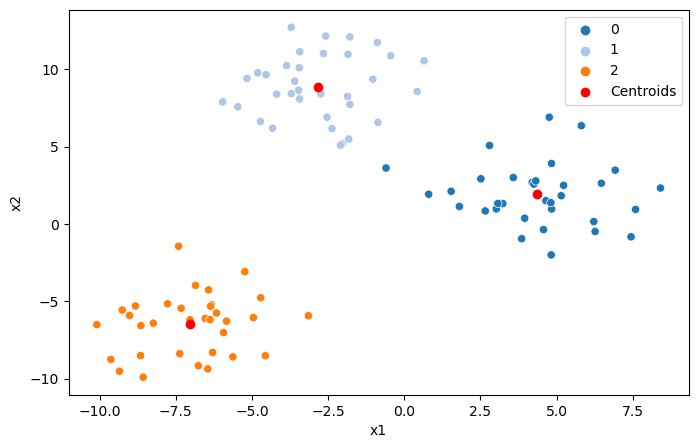

In [184]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

# The Elbow Method + Sklearn

In [185]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)

In [186]:
print("Points: ", kmeans.labels_)
print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]
Centroids:  [-2.82641022  8.85723525]


In [187]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(X))

Score:  687.643938362309
Score:  -687.643938362309


In [188]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method

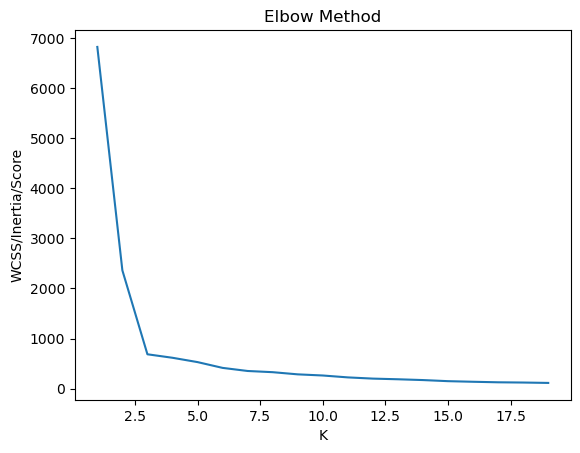

In [189]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()